<a href="https://colab.research.google.com/github/akbarehsani/backsample2/blob/master/final_image_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 4s 0us/step
10
(32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                        

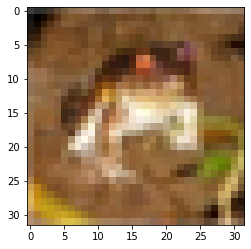

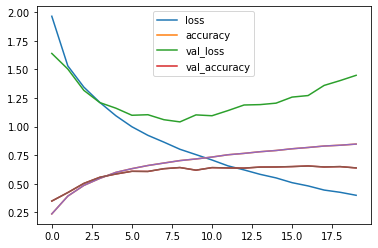

1/1 [==============================] - 0s 139ms/step
[1.3866638e-07 3.5509745e-10 2.8083855e-04 5.9522146e-01 8.4032508e-04
 3.9055833e-01 4.0959660e-03 8.9906016e-03 5.6362193e-08 1.2195325e-05]
3
airplane
313/313 [==============================] - 1s 2ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


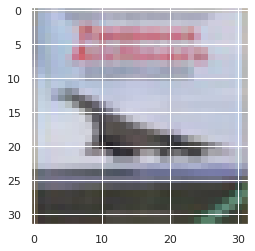

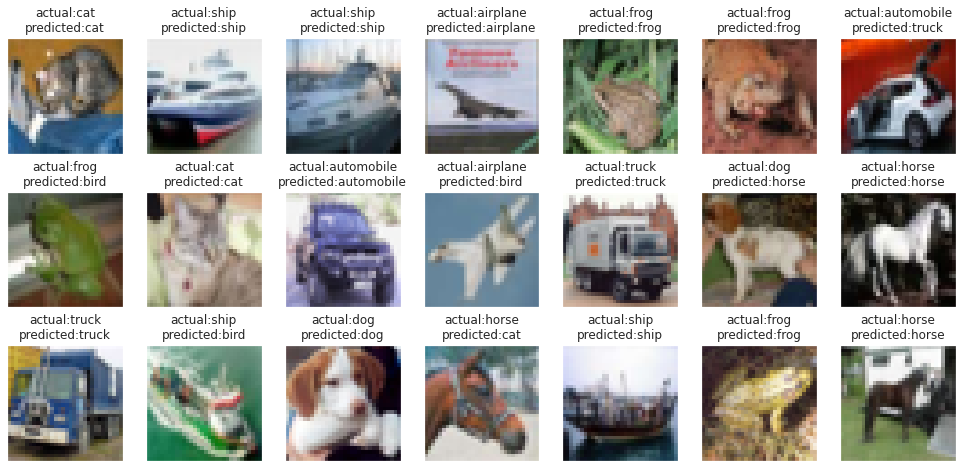

In [1]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ZhGhIonU_-3_8lDnPI6si52Q9Rjaugsu
"""

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
import pandas as pd
from keras.backend import one_hot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns



(X_train,y_train),(X_test,y_test)=cifar10.load_data()
plt.imshow(X_train[0])
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
class_num=y_test.shape[1]
print(class_num)
print(X_train.shape[1:])
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Flatten())
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Dense(class_num,activation='relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Dense(class_num,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=100)
for k,v in history.history.items():
  print(k)
pd.DataFrame(history.history).plot()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
model.save('CNN_cifar100.h5')
model2=load_model('CNN_cifar100.h5')

list=model.predict(X_test[0:10])[0]
print(list)
# print(np.max(list))
print(np.argmax(list))
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sns.set()
print(labels[0])
plt.imshow(X_test[np.argmax(list)])
# print(y_test[])
# print(labels[np.argmax(y_test[10])])
# y_test

index=0
fig,axes=plt.subplots(ncols=7,nrows=3,sharex=False,sharey=True,figsize=(17,8))
predictions=model.predict(X_test)
print(y_test)
for i in range(3):
  for j in range(7):
    axes[i,j].set_title('actual:'+labels[np.argmax(y_test[index])]+'\n'+'predicted:'+labels[np.argmax(predictions[index])])
    axes[i,j].imshow(X_test[index],cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()

# cm=confu
# predictions=np.argmax(predictions,axis=1)
# cm=confusion_matrix(y_test,predictions,labels)
# predictions=model.predict(X_test)
# predictions=np_utils.to_categorical(predictions)
# print(predictions)
# # predictions=np.argmax(predictions,axis=1)
# # cm=confusion_matrix(y_test,predictions)
# # plt.figure(figsize=(9,9))
# # sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Blues)
# # plt.xlabel('predict')
# # plt.ylabel('Actual')
# # plt.show()
# cm= np.argmax(predictions,axis=1)
# confusion_matrix(y_test,predictions)
# cm=(multilabel_confusion_matrix(y_test, Y_pred))
# cm=confusion_matrix(y_test,Y_pred)
# cm=confusion_matrix(y_test,predictions)
# print('Confusion Matrix')
# print(multilabel_confusion_matrix(y_test, Y_pred))
# print('Classification Report')
# cm=confusion_matrix(y_test,)
# y_test=np_utils.to_categorical(y_test)
# print(y_test)
# p=model.predict(X_test)
# p=OneHotEncoder.
# # .invers_transform(predictions)
# cm=confusion_matrix(y_test,predictions)

